In [1]:
#Important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("C:/Users/BRPC015042/Desktop/Python/Sentimentos nas redes sociais/03_Clustering_Marketing.csv")

In [4]:
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [5]:
data.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,0.08820,0.143667,0.328067,0.214600,0.13820,0.126600,0.104733,0.430867,0.301933,0.042133,0.732933,0.245867,0.474933,0.244667,0.112133,0.020800,0.431200,0.116467,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,0.53032,0.476209,0.810976,1.277806,0.51191,0.470801,0.539305,1.167495,1.075692,0.297261,1.194475,0.742150,1.335873,0.790810,0.585362,0.212533,1.089287,0.461862,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,15.00000,12.000000,14.000000,114.000000,12.00000,10.000000,26.000000,29.000000,27.000000,9.000000,23.000000,18.000000,52.000000,17.000000,30.000000,11.000000,21.000000,7.000000,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [6]:
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [7]:
data['gender'].value_counts(dropna = False) #display NaN values also

gender
F      11057
M       2606
NaN     1337
Name: count, dtype: int64

In [8]:
data['gender'].fillna('not disclosed', inplace = True)

In [9]:
data['gender'].isnull().sum()

0

In [10]:
data['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

In [12]:
#Uma forma de lidar com estes valores em falta seria preencher os valores em falta com a idade média de cada ano de licenciatura

#Quando você define errors='coerce', está instruindo o Pandas a converter os valores que não podem ser convertidos em números (como strings que representam texto) em valores NaN (Not a Number). Ou seja, ele "coerce" os valores não numéricos para NaN.

data['age'] = pd.to_numeric(data['age'], errors='coerce')


In [13]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

In [14]:
#Agora vamos preencher os valores em falta para cada ano de graduação com a média que obtivemos como acima

data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [15]:
data['age'].isnull().sum()

0

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


Iniciando o processamento...


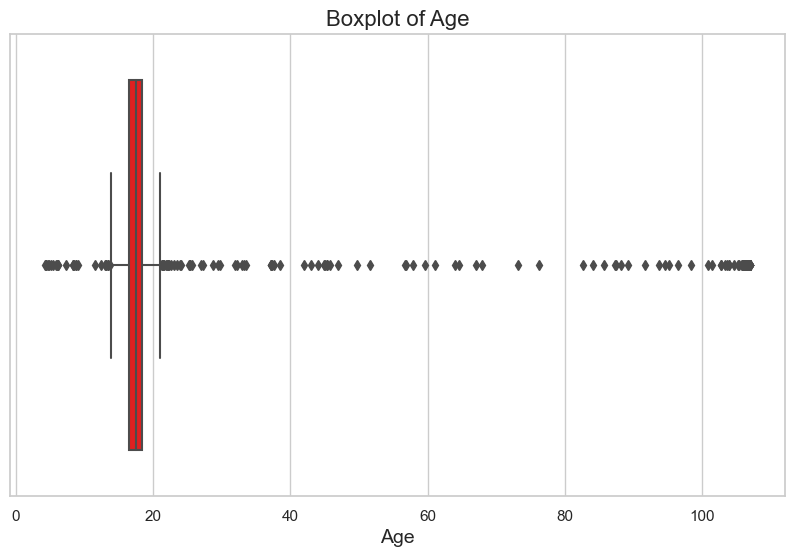

Processamento concluído.


In [16]:

## Barra de progresso
from tqdm import tqdm
import time

# Loop de exemplo
for i in tqdm(range(10)):
    time.sleep(0.5)  # Simula uma operação demorada
sns.set(style="whitegrid") 

print("Iniciando o processamento...")
# Código de processamento aqui

##

# procurando outliers com box plot

plt.figure(figsize=(10, 6))  

sns.boxplot(x=data['age'], color='red')

plt.xlabel('Age', fontsize=14)
plt.title('Boxplot of Age', fontsize=16)

# Show the plot
plt.show()

print("Processamento concluído.")

In [17]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1
print(iqr)

1.855134201954396


In [18]:
df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In [19]:
df['age'].describe()

count    14824.000000
mean        17.392977
std          1.134571
min         13.843000
25%         16.539000
50%         17.446000
75%         18.400134
max         21.065000
Name: age, dtype: float64

In [20]:
df.shape

(14824, 40)

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

Iniciando o processamento...


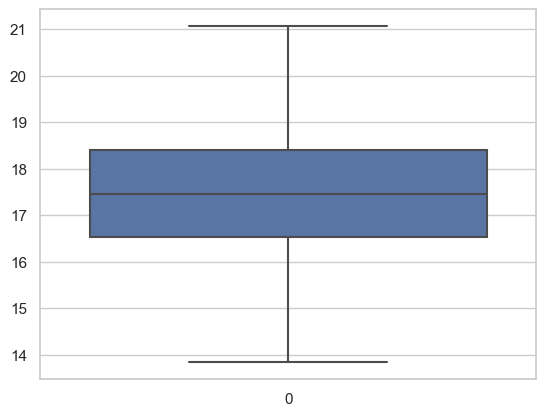

Processamento concluído.


In [21]:
## Barra de progresso
from tqdm import tqdm
import time

# Loop de exemplo
for i in tqdm(range(10)):
    time.sleep(0.5)  # Simula uma operação demorada
sns.set(style="whitegrid") 

print("Iniciando o processamento...")
# Código de processamento aqui

#gráfico

sns.boxplot(df["age"])
plt.show()


#finalizado
print("Processamento concluído.")

In [ ]:
#Não existem mais outliers nas colunas

In [22]:
#Processamento dos dados 

names = df.columns[4:40]
scaled_feature = data.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [23]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [25]:
features = scaled_feature[names]

In [26]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [28]:
features = scaler.transform(features.values)

In [29]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,-0.355535,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,0.393064,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,1.725515,-0.166320,-0.301698,-0.404546,2.179902,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,0.223592,2.363663,-0.355535,0.955171,-0.191569,-0.09787,3.276381,-0.252176,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,-0.355535,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,-0.209231,-0.200570,5.490828,-0.301698,6.994189,-0.167950,3.637091,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,0.223592,-0.331301,0.393064,0.955171,-0.191569,-0.09787,4.194444,-0.252176,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


In [30]:
#convertendo variáveis para numérico (genero)

def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3

In [31]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    3
1    2
2    2
3    2
4    2
Name: gender, dtype: int64

In [32]:
#Checando valores rtansformados
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,-0.355535,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,2,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,0.393064,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,2,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,1.725515,-0.166320,-0.301698,-0.404546,2.179902,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,0.223592,2.363663,-0.355535,0.955171,-0.191569,-0.09787,3.276381,-0.252176,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,2,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,-0.209231,-0.200570,-0.166320,-0.301698,-0.404546,-0.167950,-0.269978,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,-0.613623,-0.331301,-0.355535,-0.309398,-0.191569,-0.09787,-0.395869,-0.252176,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,2,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,-0.209231,-0.200570,5.490828,-0.301698,6.994189,-0.167950,3.637091,-0.268912,-0.194207,-0.369065,-0.280697,-0.141743,0.223592,-0.331301,0.393064,0.955171,-0.191569,-0.09787,4.194444,-0.252176,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


In [33]:
#agrupando dados 
#O modelo K-Means é um algoritmo de aprendizado não supervisionado usado para agrupar dados semelhantes em clusters. 
#Ele é amplamente utilizado em tarefas de mineração de dados e análise de cluster para identificar padrões nos dados.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [34]:
model = kmeans.fit(scaled_feature)

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


Iniciando o processamento...


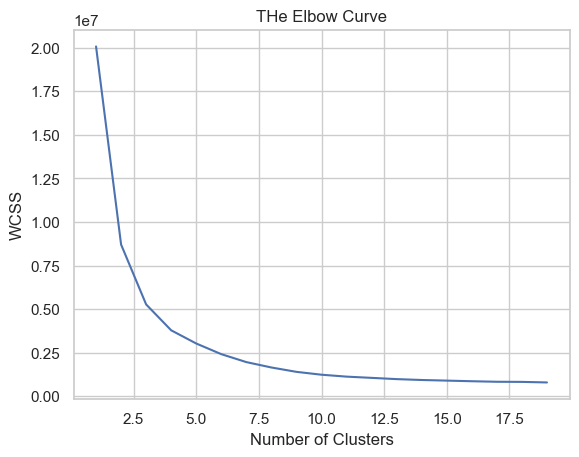

Processamento concluído.


In [35]:
#O Elbow Method (método do cotovelo) é uma técnica comum usada para determinar o número ideal de clusters 
#em um conjunto de dados ao usar o algoritmo K-Means ou outros algoritmos de agrupamento. 
#Ele recebe esse nome porque, ao plotar o número de clusters em relação à soma dos quadrados das distâncias 
#intra-cluster, a curva resultante frequentemente se assemelha a um braço dobrado, como um cotovelo.

## Barra de progresso
from tqdm import tqdm
import time

# Loop de exemplo
for i in tqdm(range(10)):
    time.sleep(0.5)  # Simula uma operação demorada
sns.set(style="whitegrid") 

print("Iniciando o processamento...")
# Código de processamento aqui

#gráfico

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

#finalizado
print("Processamento concluído.")


In [36]:
#A localização de uma curva (joelho) no gráfico é geralmente considerada como um indicador do número adequado de clusters. 
#O nosso ponto de cotovelo situa-se em torno de um tamanho de cluster de 5. 
#Utilizaremos k=5 para interpretar melhor o nosso resultado de agrupamento.

kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [37]:
kmeans.labels_

array([1, 4, 0, ..., 0, 0, 0])

In [38]:
#A função len() em Python retorna o comprimento de um objeto, que pode ser uma lista, uma tupla, uma string, etc. 
#Portanto, len(kmeans.labels_) retorna o número de elementos na lista de rótulos de cluster, ou seja, 
#o número total de pontos de dados que foram agrupados pelo algoritmo K-Means.

#Essa informação pode ser útil para avaliar o resultado do agrupamento, verificar se todos os pontos de dados 
#foram atribuídos a um cluster e para realizar outras operações de pós-processamento nos dados agrupados.

len(kmeans.labels_)

15000

In [40]:
data['cluster'] = kmeans.labels_

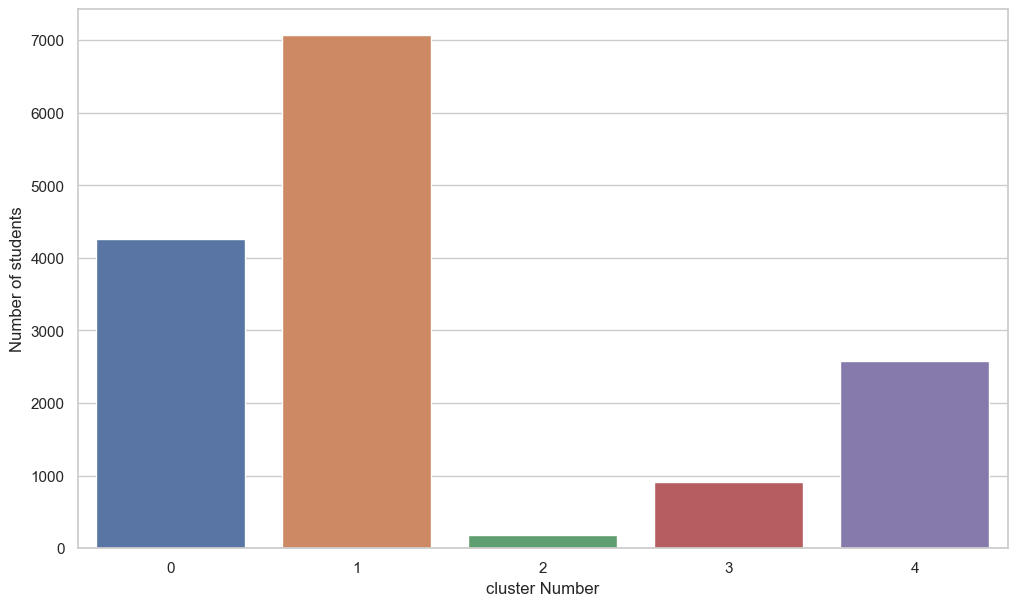

In [41]:
#interpretando o resultado do cluster

plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

#A partir do gráfico, podemos ver que o agrupamento 1 é o maior e o agrupamento 2 tem menos alunos adolescentes.

In [42]:
#Vejamos o número de alunos pertencentes a cada agrupamento

size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array

[4263, 7072, 177, 912, 2576]

In [43]:
# média de idade para cada agrupamento

mean_age = data.groupby('cluster')['age'].mean()


for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")

Cluster 0: 18.02 years
Cluster 1: 18.06 years
Cluster 2: 17.58 years
Cluster 3: 17.79 years
Cluster 4: 17.77 years


In [44]:
data['gender'] = data['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})

In [45]:
data['gender'].value_counts()

gender
0    11057
1     2606
3     1337
Name: count, dtype: int64

In [46]:
# contagem de "Femininos" por grupo

# Calculate the percentage of females in each cluster
percentage_female = data[data['gender'] == 0].groupby('cluster').size() / data.groupby('cluster').size() * 100

# Print the percentage of females in each cluster in a readable format
for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")

Cluster 0: 75.18% females
Cluster 1: 70.35% females
Cluster 2: 87.01% females
Cluster 3: 79.28% females
Cluster 4: 77.64% females


In [47]:
# contagem de "amigos" no cluster

# Calculate the average number of friends in each cluster
mean_friends = data.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")

Cluster 0: Average number of friends = 29.42
Cluster 1: Average number of friends = 5.05
Cluster 2: Average number of friends = 199.71
Cluster 3: Average number of friends = 105.74
Cluster 4: Average number of friends = 60.00


In [48]:
#outras análises

cluster_analysis = pd.DataFrame({
    'Mean Age': mean_age,
    'Percentage Female': percentage_female,
    'Mean Number of Friends': mean_friends,
    'Number of Students': size_array  
})

print("Cluster Analysis:")
for cluster, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster}:")
    print(f"  Mean Age: {row['Mean Age']:.2f} years")
    print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
    print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
    print(f"  Number of Students: {row['Number of Students']}")
    print()  

Cluster Analysis:
Cluster 0:
  Mean Age: 18.02 years
  Percentage Female: 75.18%
  Mean Number of Friends: 29.42
  Number of Students: 4263.0

Cluster 1:
  Mean Age: 18.06 years
  Percentage Female: 70.35%
  Mean Number of Friends: 5.05
  Number of Students: 7072.0

Cluster 2:
  Mean Age: 17.58 years
  Percentage Female: 87.01%
  Mean Number of Friends: 199.71
  Number of Students: 177.0

Cluster 3:
  Mean Age: 17.79 years
  Percentage Female: 79.28%
  Mean Number of Friends: 105.74
  Number of Students: 912.0

Cluster 4:
  Mean Age: 17.77 years
  Percentage Female: 77.64%
  Mean Number of Friends: 60.00
  Number of Students: 2576.0



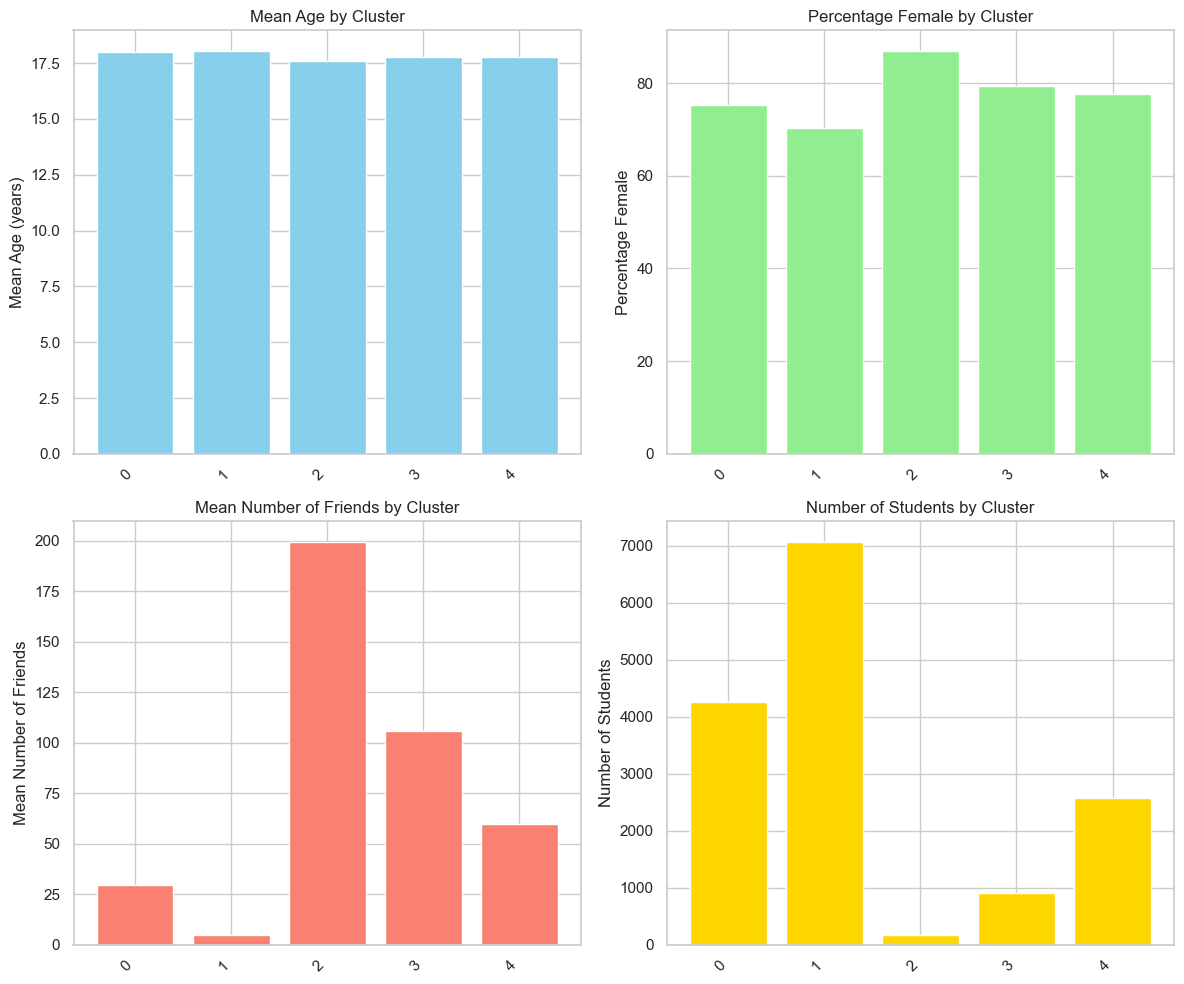

In [49]:
#Gráficos 

clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [50]:
#Descrição da característica do cluster

def describe_clusters(df):
   
    # Describe cluster characteristics
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    
    return cluster_df

describe_clusters(data)

Cluster Characteristics:


cluster,0,1,2,3,4
gradyear,2007.486512,2007.428592,2007.864407,2007.654605,2007.620730
gender,0.389866,0.502121,0.231638,0.406798,0.385093
age,18.016845,18.058586,17.583292,17.793173,17.765389
NumberOffriends,29.422472,5.054440,199.706215,105.742325,60.000000
basketball,0.297912,0.213660,0.322034,0.328947,0.336568
football,0.276566,0.224123,0.361582,0.302632,0.282609
soccer,0.237861,0.191601,0.203390,0.277412,0.260870
softball,0.159981,0.118495,0.146893,0.279605,0.230590
volleyball,0.165611,0.101810,0.242938,0.189693,0.194876
swimming,0.149191,0.110718,0.203390,0.142544,0.170807


In [ ]:
# conclusão :

#Recomendação para o departamento de marketing
#Direcionar produtos centrados no sexo feminino:
#Os grupos 1, 2 e 3 têm uma maior percentagem de mulheres em comparação com a população em geral. Por conseguinte, os produtos ou anúncios que visam especificamente raparigas adolescentes podem ter um bom desempenho nestes grupos. Os produtos relacionados com a moda, a beleza, a socialização ou o estilo de vida podem ter mais impacto nestes grupos.

#Compreender os interesses centrados nos homens:
#Os grupos 0 e 4 têm uma maior percentagem de homens. Compreender os interesses e preferências dos rapazes adolescentes dentro destes grupos pode ajudar a desenvolver campanhas de marketing adaptadas às suas necessidades. Os produtos relacionados com desporto, tecnologia, jogos ou aventura podem ser mais atraentes para estes grupos.

#Promoções de moda e retalho:
#Os clusters 2 e 3 mostram um maior interesse em compras, sugerindo que as campanhas publicitárias ou promoções relacionadas com compras podem ser mais eficazes para estes clusters.

#Parcerias com marcas desportivas e de estilo de vida:
Colaborar com marcas desportivas ou organizar eventos e actividades relacionadas com o desporto para atrair os clusters que demonstram um forte interesse pelo desporto (por exemplo, os Clusters 3 e 4).